# Light Gradient Boost Machine

LightGBM은 GBM 머신 중 하나라서 원리는 같다.
대신 더 빠른 훈련 속도, 더 높은 성능, 특히 큰 데이터셋에서 효과적이다.

분류(Classification)와 회귀(Regression) 문제에 둘 다 사용할 수 있다.


- Light GBM은 leaf-wise 전략

- XGBoost는 Level-wise 전략

먼저, Level-wise 부터 설명하겠다.

### Level-wise

트리의 깊이를 최소화 한다. 트리가 균형있게 분열하기 때문에 과적합에 강하지만, 모든 노드를 균형있게 처리해야 하기 때문에 학습시간이 더 오래 걸린다.

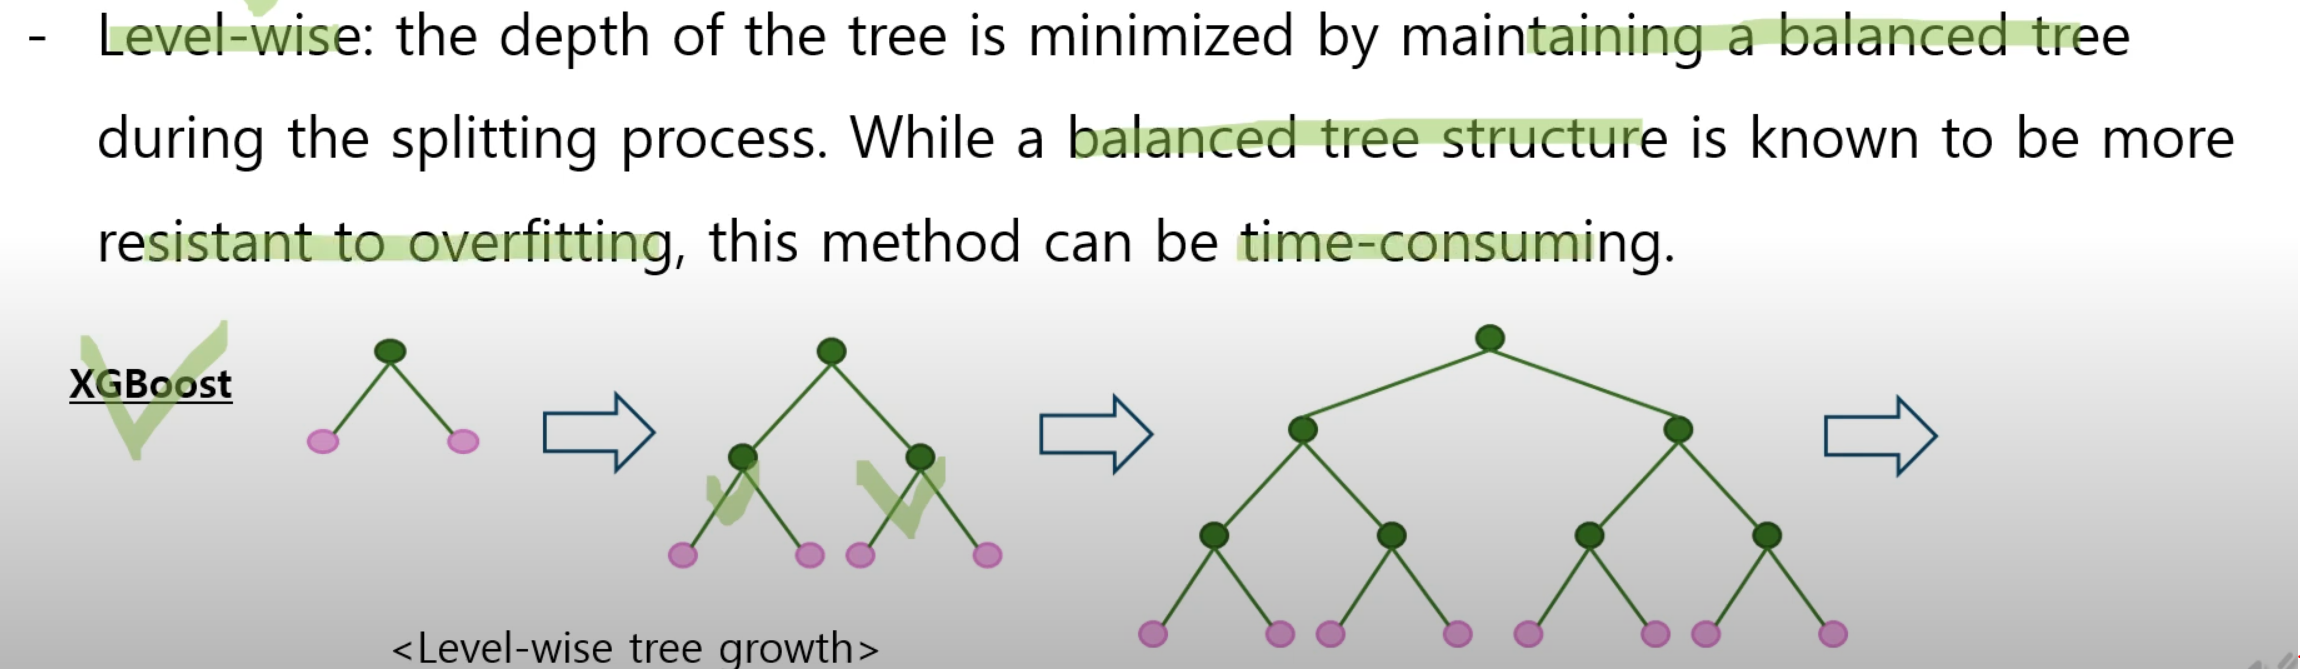

### Leaf-wise

손실 값(loss value)이 가장 큰 leaf node 부터 분열하기 때문에 비대칭 적이고 깊은 트리가 만들어진다.

손실을 최소화 하는 방향으로 잎의 노드를 선택하여 지속적으로 분할하기 때문에 앞서 말한 방법보다 예측 손실을 최소화할 수 있다.

그러나 트리가 깊어지면서 과적합이 일어날 수 있다. 1000개 이하의 데이터를 다룰 경우 과적합에 취약해질 수 있다.

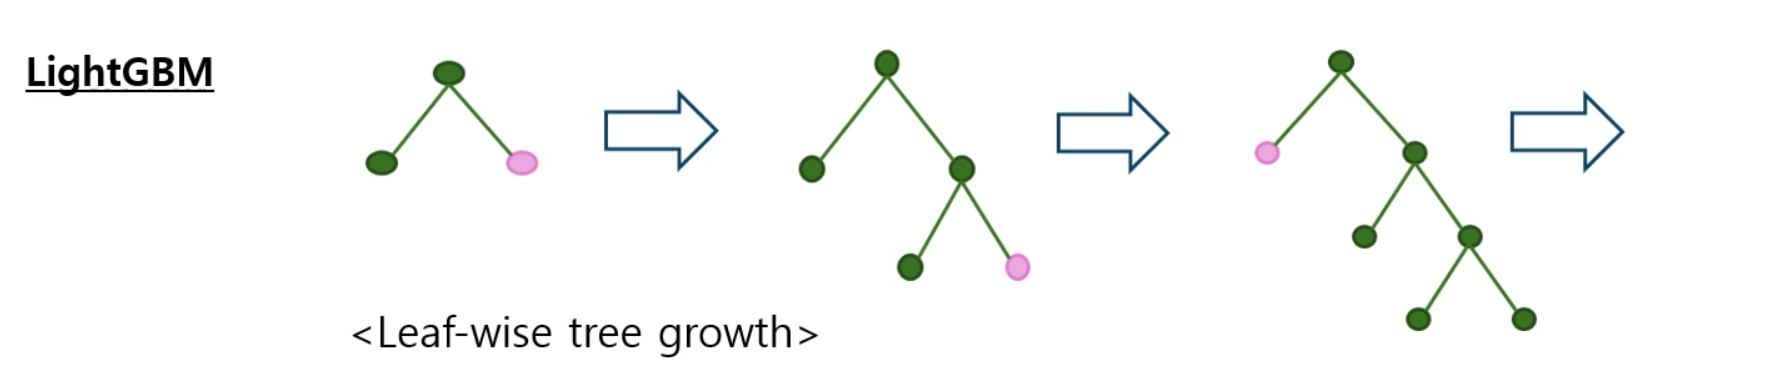

### Gradient-based One-Side Sampling (GOSS)

- 기존 GBM에서는 기울기(gradient)는 error function에서 가장 가파른 방향과 속도를 나타냈다.

- 큰 기울기는 큰 예측 오류를 나타내며, 그 결과 정확하게 예측하기 어렵다는 것을 의미한다.

- 기울기 값이 큰 데이터들을 냅두고, 기울기가 작은 데이터들은 더 작게 랜덤 샘플링을 진행한다. 즉, 기울기 값이 큰 애들은 더 학습시켜야 하니까 냅두는 거다.

앞에 원리를 통해, 예측하기 어려운 데이터들에 더 집중할 수 있고, 훈련 데이터의 크기를 줄이기 때문에 훈련 시간을 줄일 수 있게 된다.


### GOSS 예제



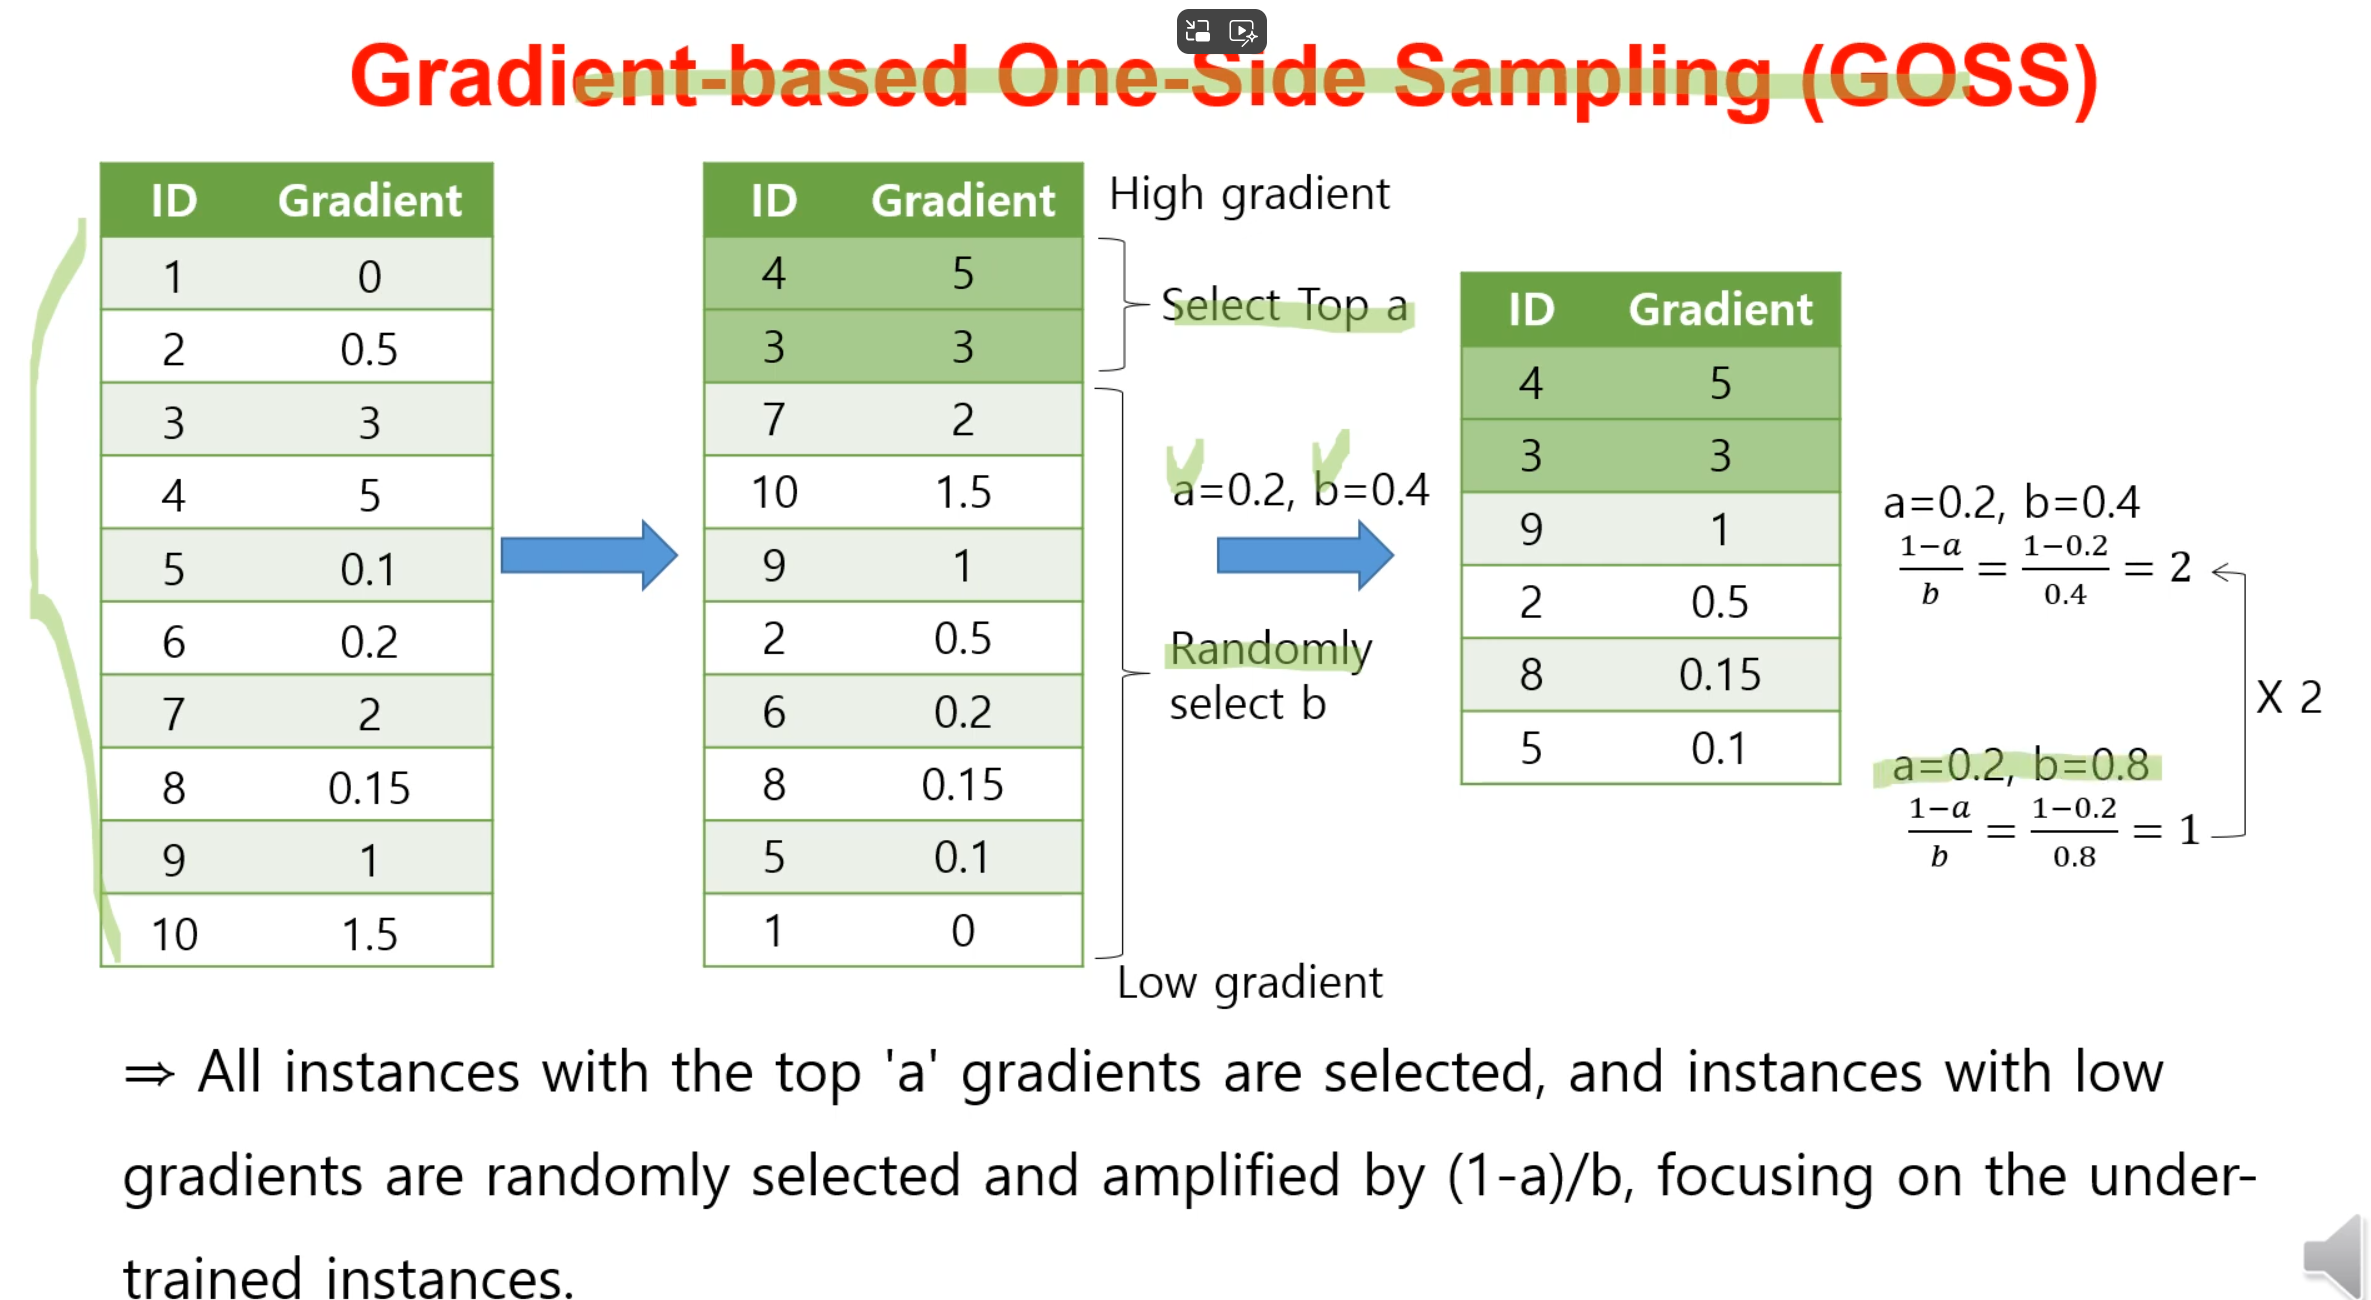

- a : **높은 기울기의 값**들을 얼만큼 선택할 건지에 대한 **비율**
- b : **낮은 기울기의 값**들을 얼만큼 랜덤하게 선택할거지에  대한 **비율**

- a와 b를 어떻게 선택하는 지에 따라 모델의 성능이 달리질 수 있다.
  - a = 0.2, b = 0.8 -> 1

  - a = 0.2, b = 0/4 -> 2

  2배 이상 성능 차이를 보여준다.





### One-hot encoding



원한 인코딩은 이름이나 라벨, 숫자가 아닌 데이터들을 머신러닝에 사용할 수 있도록 아래 사진 처럼 만들어주는 것이다.

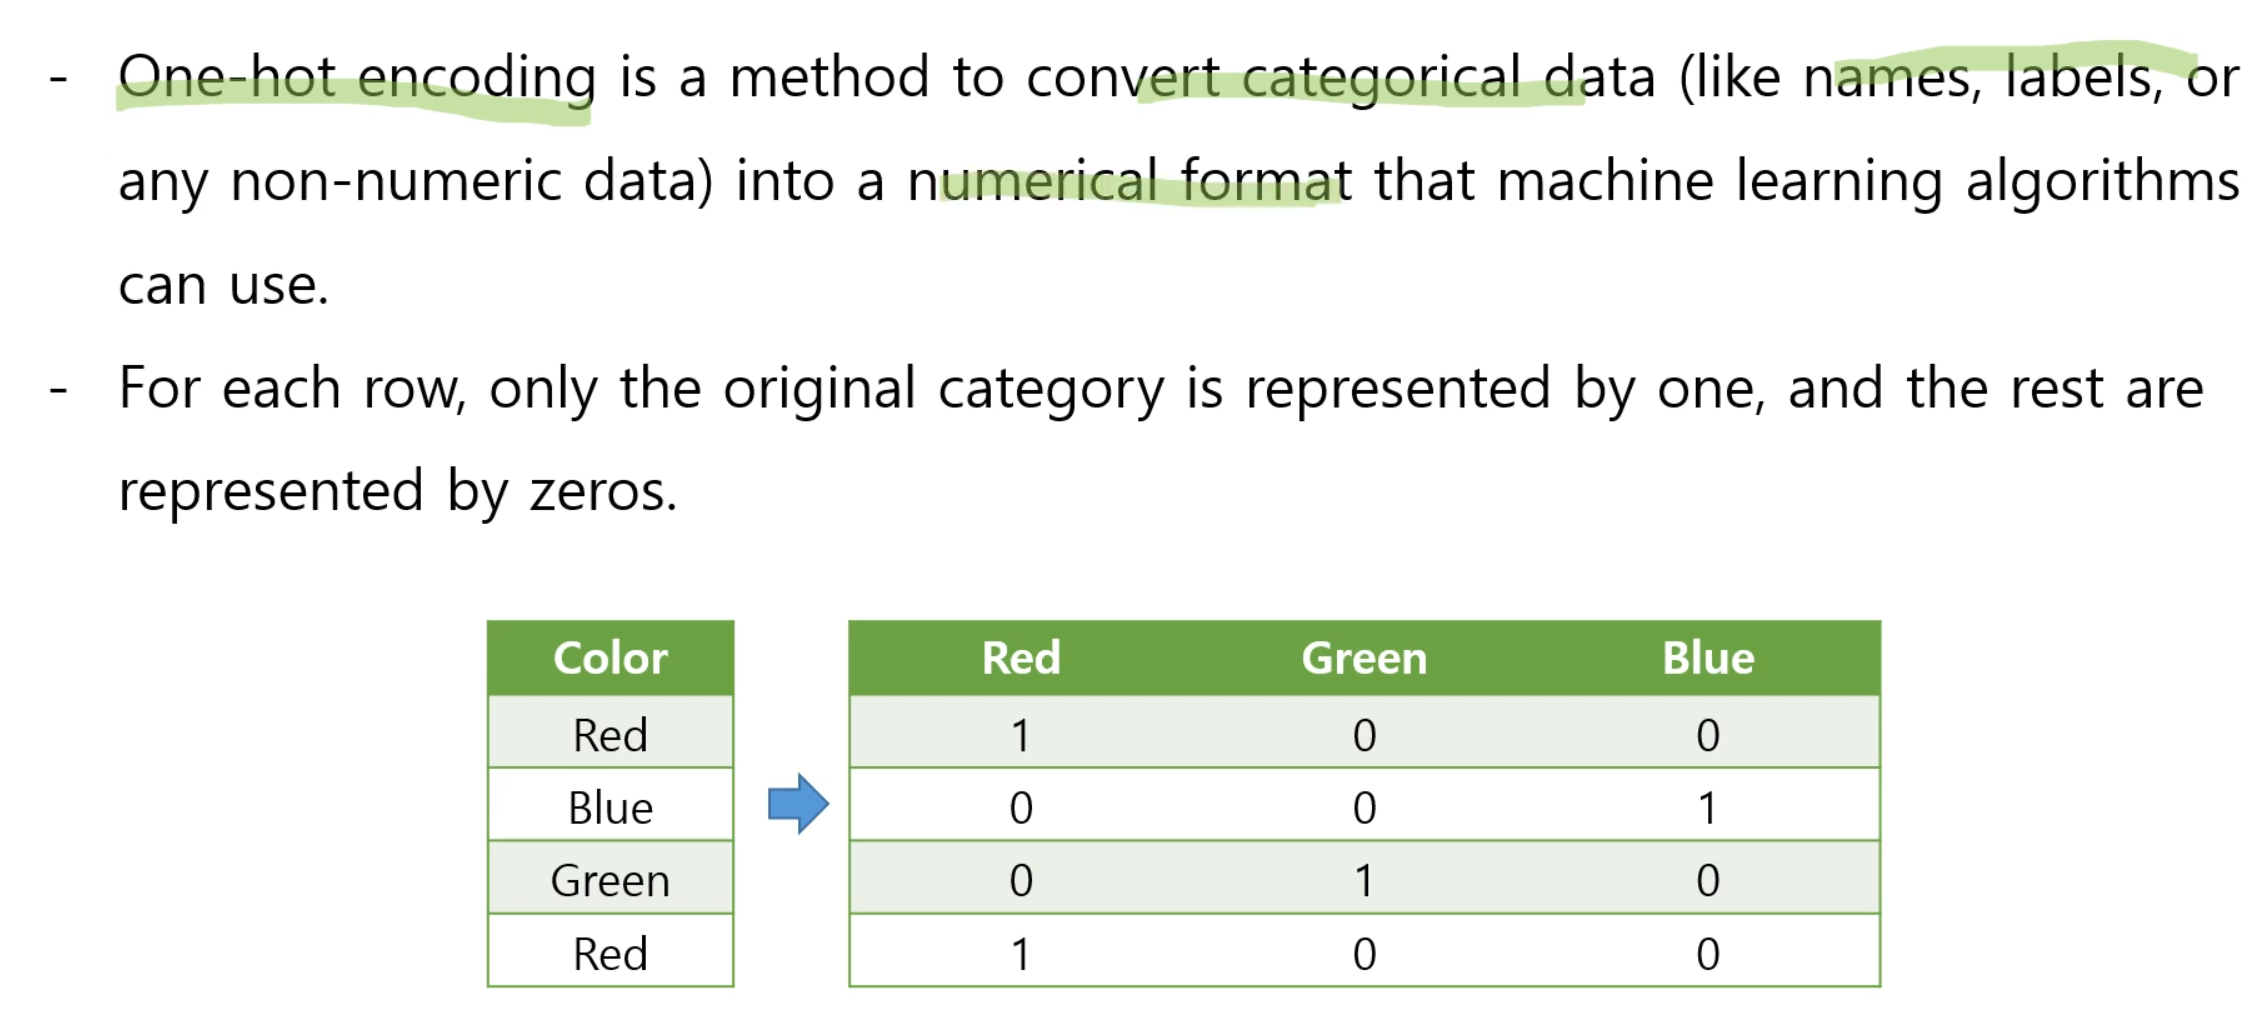

### One-hot Coding에 문제점

클래스가 많아질 수록, 차원의 수가 늘어나게 된다. -> 컬럼 수가 늘어난다는 얘기

그렇게 되면 **한 열에 한 개만 1이고, 나머지는 0인 열**이 생기는 거다. 이것을 **sparse features**라고 부른다.  

그 결과, sparse feature를 다루지 않으면 메모리 사용과 계산을 많이 해야되게 된다.


### Exclusive Feature Bundling (EFB)

One-hot coding을 보완하기 위해 나온 방법이다.

같은 데이터에서 함께 발생할 수 없는 특성들을 그룹화하여 처리한다는 것이다. -> 0인 부분이 최소화하거나 없게 만드는 것

왼쪽은 one-hot coding, 오른 쪽은 EFB이다.


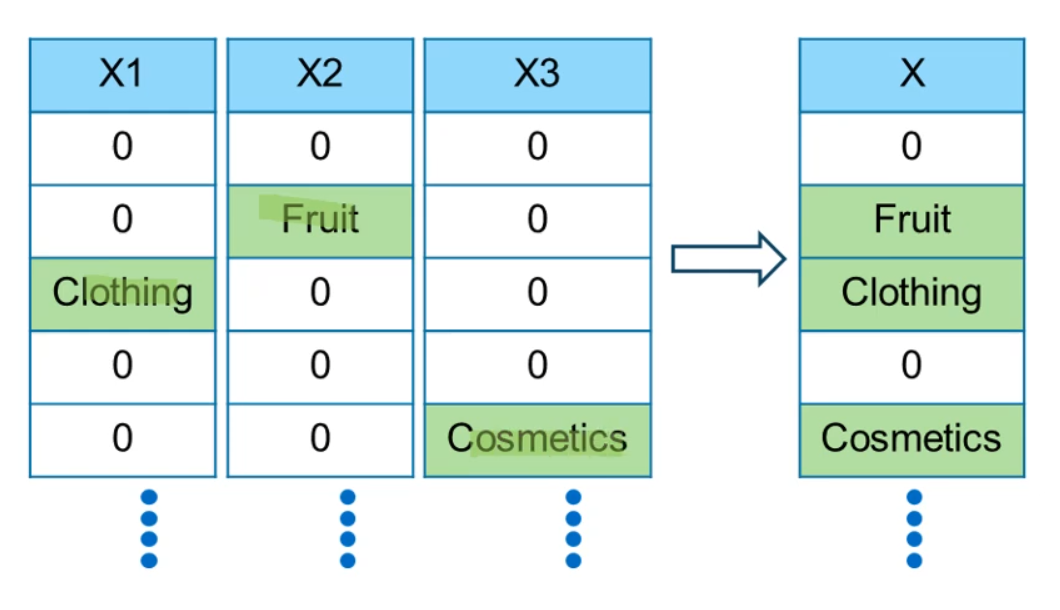

In [8]:
from sklearn.datasets import load_iris
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# GBM 모델 생성
model = LGBMClassifier(max_depth = 6,num_leaves = 31,learning_rate=0.01)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
print('정확도 : ', model.score(X_train, y_train))

# 클래스별 예측 확률
print(model.predict_proba(X_test))

# 성능 평가
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 4
[LightGBM] [Info] Start training from score -1.157453
[LightGBM] [Info] Start training from score -1.157453
[LightGBM] [Info] Start training from score -0.990399
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
